<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Assignment/AIMLCEP_Q1-b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Huge{\text{Linear Regression with Regularizers}}$

In this session, we shall learn about linear regression when we impose regularizers on the parameters. 

Let us first consider a sample data, which will be useful for our study of linear regression with regularizers. 

In [40]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import numpy as np 
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet. 
The data set we will consider represents airline costs for different airline companies as a response variable dependent on multiple attributes. 


In [41]:
#Let us explore the data and the description 

#Get the data from the web 
weight_height_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q1/Q1_train.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
weight_height_data.head()


,Species,Length_cm,Height_pct,Width_pct,Weight_g
0,1,30.0,38.4,13.4,242.0
1,1,31.2,40.0,13.8,290.0
2,1,31.1,39.8,15.1,340.0
3,1,33.5,38.0,13.3,363.0
4,1,34.0,36.6,15.1,430.0


In [42]:
#if you wish to print the entire data, then use the following
weight_height_data

,Species,Length_cm,Height_pct,Width_pct,Weight_g
0,1,30.0,38.4,13.4,242.0
1,1,31.2,40.0,13.8,290.0
2,1,31.1,39.8,15.1,340.0
3,1,33.5,38.0,13.3,363.0
4,1,34.0,36.6,15.1,430.0
...,...,...,...,...,...
119,7,42.5,26.2,15.6,820.0
120,7,44.6,28.7,15.4,1100.0
121,7,45.2,26.4,16.1,1000.0
122,7,45.5,27.5,16.3,1100.0


Let us move the Weight column as the second column, just after the species column name. 

In [43]:
# shift column 'TOC' to second position
weight_g_column = weight_height_data.pop('Weight_g') #collect the contents of weight_g  column into a temporary object 
  
# insert column into the dataframe using insert(position,column_name,
# column_contents) function
weight_height_data.insert(1, 'Weight_g', weight_g_column) #Insert as second column, so position is 1
  
print("After shifting weight_g column to second position")
weight_height_data.head()

After shifting weight_g column to second position


,Species,Weight_g,Length_cm,Height_pct,Width_pct
0,1,242.0,30.0,38.4,13.4
1,1,290.0,31.2,40.0,13.8
2,1,340.0,31.1,39.8,15.1
3,1,363.0,33.5,38.0,13.3
4,1,430.0,34.0,36.6,15.1


$\Large{\text{Computing } \beta \text{ for the  weigth height data set}}:$

In [44]:
#Let us now compute beta 
n = len(weight_height_data.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 124


In [45]:
#extract the predictor variable columns 
cols = [2,3,4]
X_data = weight_height_data[weight_height_data.columns[cols]]

X_data

,Length_cm,Height_pct,Width_pct
0,30.0,38.4,13.4
1,31.2,40.0,13.8
2,31.1,39.8,15.1
3,33.5,38.0,13.3
4,34.0,36.6,15.1
...,...,...,...
119,42.5,26.2,15.6
120,44.6,28.7,15.4
121,45.2,26.4,16.1
122,45.5,27.5,16.3


In [46]:
#convert predictor variable columns into a numpy array

X_array = weight_height_data[weight_height_data.columns[cols]].to_numpy()
X_array

array([[30. , 38.4, 13.4],
       [31.2, 40. , 13.8],
       [31.1, 39.8, 15.1],
       [33.5, 38. , 13.3],
       [34. , 36.6, 15.1],
       [34.5, 41.1, 15.3],
       [35. , 36.2, 13.4],
       [36.2, 39.3, 13.7],
       [36.2, 39.4, 14.1],
       [36.2, 39.7, 13.3],
       [36.4, 37.8, 12. ],
       [37.2, 40.2, 13.9],
       [37.2, 41.5, 15. ],
       [38.3, 38.8, 13.8],
       [38.5, 38.8, 13.5],
       [38.6, 40.5, 13.3],
       [38.7, 37.4, 14.8],
       [39.2, 40.8, 13.7],
       [39.7, 39.1, 13.3],
       [40.6, 38.1, 15.1],
       [40.5, 40.1, 13.8],
       [40.9, 40. , 14.8],
       [40.6, 40.3, 15. ],
       [41.6, 40.6, 14.9],
       [42.6, 44.5, 15.5],
       [44.1, 40.9, 14.3],
       [44. , 41.1, 14.3],
       [45.3, 41.4, 14.9],
       [45.9, 40.6, 14.7],
       [28.7, 29.2, 14.8],
       [29.3, 27.8, 14.5],
       [30.8, 28.5, 15.2],
       [39.6, 29.7, 16.6],
       [43.5, 28.4, 15. ],
       [16.2, 25.6, 14. ],
       [20.3, 26.1, 13.9],
       [22.2, 25.3, 14.3],
 

In [47]:
import numpy as np
#add a column of ones to X_array
X = np.hstack((X_array, np.ones((X_array.shape[0], 1), dtype=X_array.dtype)))

X

array([[30. , 38.4, 13.4,  1. ],
       [31.2, 40. , 13.8,  1. ],
       [31.1, 39.8, 15.1,  1. ],
       [33.5, 38. , 13.3,  1. ],
       [34. , 36.6, 15.1,  1. ],
       [34.5, 41.1, 15.3,  1. ],
       [35. , 36.2, 13.4,  1. ],
       [36.2, 39.3, 13.7,  1. ],
       [36.2, 39.4, 14.1,  1. ],
       [36.2, 39.7, 13.3,  1. ],
       [36.4, 37.8, 12. ,  1. ],
       [37.2, 40.2, 13.9,  1. ],
       [37.2, 41.5, 15. ,  1. ],
       [38.3, 38.8, 13.8,  1. ],
       [38.5, 38.8, 13.5,  1. ],
       [38.6, 40.5, 13.3,  1. ],
       [38.7, 37.4, 14.8,  1. ],
       [39.2, 40.8, 13.7,  1. ],
       [39.7, 39.1, 13.3,  1. ],
       [40.6, 38.1, 15.1,  1. ],
       [40.5, 40.1, 13.8,  1. ],
       [40.9, 40. , 14.8,  1. ],
       [40.6, 40.3, 15. ,  1. ],
       [41.6, 40.6, 14.9,  1. ],
       [42.6, 44.5, 15.5,  1. ],
       [44.1, 40.9, 14.3,  1. ],
       [44. , 41.1, 14.3,  1. ],
       [45.3, 41.4, 14.9,  1. ],
       [45.9, 40.6, 14.7,  1. ],
       [28.7, 29.2, 14.8,  1. ],
       [29

In [48]:
#convert predictor variable columns into a numpy array

response_cols = [1]
y = weight_height_data[weight_height_data.columns[response_cols]].to_numpy()
y


array([[ 242. ],
       [ 290. ],
       [ 340. ],
       [ 363. ],
       [ 430. ],
       [ 500. ],
       [ 390. ],
       [ 500. ],
       [ 475. ],
       [ 500. ],
       [ 500. ],
       [ 600. ],
       [ 600. ],
       [ 700. ],
       [ 700. ],
       [ 610. ],
       [ 650. ],
       [ 685. ],
       [ 620. ],
       [ 680. ],
       [ 700. ],
       [ 725. ],
       [ 720. ],
       [ 850. ],
       [1000. ],
       [ 920. ],
       [ 955. ],
       [ 925. ],
       [ 975. ],
       [ 270. ],
       [ 270. ],
       [ 306. ],
       [ 800. ],
       [1000. ],
       [  40. ],
       [  69. ],
       [  87. ],
       [ 120. ],
       [ 110. ],
       [ 120. ],
       [ 150. ],
       [ 160. ],
       [ 140. ],
       [ 160. ],
       [ 161. ],
       [ 200. ],
       [ 180. ],
       [ 272. ],
       [ 390. ],
       [  55. ],
       [  60. ],
       [ 120. ],
       [ 150. ],
       [ 140. ],
       [ 145. ],
       [ 200. ],
       [ 273. ],
       [ 300. ],
       [   6.7

In [49]:
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X),X)
print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X),y)
#print('Xy shape:',Xy.shape)

#solving a system of linear equations Ax=b, can be done using np.linalg.solve(A,b)

beta =np.linalg.solve(XTX,Xy)
#beta = np.matmul(np.linalg.inv(XTX),Xy)

print('beta',beta)



XTX shape: (4, 4)
beta [[  27.84061258]
 [   2.07389234]
 [  14.30933029]
 [-729.99768625]]


In [50]:
print(np.linalg.matrix_rank(XTX))
XTX_inv = np.linalg.inv(XTX)

#print(np.matmul(XTX,XTX_inv))
is_identity = np.all(np.matmul(XTX,XTX_inv)==np.identity(XTX.shape[0]))
print(is_identity)

4
False


$\textbf{Note:}$ Though the matrix $X^\top X$ is not full-rank, that is, $10:= \text{rank}(X^\top X)<11$, we see that $\texttt{numpy}$ does not raise any error while computing the inverse of $X^\top X$. Hence we will use $\texttt{scipy}$ to solve for $\beta$ and check if we get any error. 

In [51]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X),X)
#print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X),y)
#print('Xy shape:',Xy.shape)

beta =scipy.linalg.solve(XTX,Xy)
#beta = np.matmul(scipy.linalg.inv(XTX),Xy)

print('beta', beta)

beta [[  27.84061258]
 [   2.07389234]
 [  14.30933029]
 [-729.99768625]]


$\textbf{Note:}$ $\texttt{scipy}$ gives a warning that the matrix $X^\top X$ is ill-conditioned. 

We can use the condition number of a matrix $A$ to identify if the matrix is ill-conditioned or not. 

Suppose we solve a system $Ax=b$, then the condition number of $A$ denotes the amount of error that can be incurred in the decision variable $x$ when there is a small error in $b$. 

For a symmetric matrix $A$, we can compute the condition number of $A$ denoted by $\kappa(A)$ as:

$\begin{align}
\kappa(A) = \frac{|\lambda_{\max}(A)|}{|\lambda_{\min}(A)|}
\end{align}
$

where $\lambda_{\max}(A)$ and $\lambda_{\min}(A)$ denote respectively the maximum and minimum eigen values of $A$ and $|z|$ denotes the absolute value of a real number $z$.

If the condition number $\kappa(A)$ is a $\textbf{large number}$ then the error incurred in $x$ would be large and hence the matrix $A$ is called $\textbf{ill-conditioned}$.  


Let us compute the condition number of $X^\top X$.

In [52]:
#condition number of XTX
print(np.linalg.cond(XTX))

99781.81402777958


$\textbf{Adding $\ell_2$ regularizer to improve the conditioning of the matrix}$: 

We shall motivate the use of $\ell_2$ regularizer to improve the conditioning of the matrix. 

Instead of minimizing the original OLS objective 
$
\begin{align}
L_{OLS}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

we shall now minimize the OLS objective added with a scaled $\ell_2$ regularizer. 

The $\ell_2$ regularizer in $\beta \in {\mathbb{R}}^{d+1}$ is defined as the squared $\ell_2$ norm of $\beta$: 

$
\begin{align}
\|\beta\|_2^2 = \sum_{i=1}^{d+1} \beta_i^2.  
\end{align}
$

Hence we shall now solve: 
$
\begin{align}
L_{\text{ridge}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \lambda \sum_{i=1}^{d+1} \beta_i^2. 
\end{align}
$ 

The above objective function is called $\textbf{ridge}$ regression objective. $\lambda>0$ is a regularization hyperparameter. 



Now we can write the objective function as:

$
L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2.
$

To solve 

$
\min_\beta L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L_{\text{ridge}}(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta + \lambda I\beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X}+\lambda I)^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is always valid since $(\mathbf{X}^\top\mathbf{X}+\lambda I)$ is invertible.  


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100\}$ let us check the condition number of $(X^\top X+\lambda I)$. 

In [53]:
lambdas = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000])
I = np.identity(XTX.shape[0])

for lambda_ in lambdas:
  print('lambda:',lambda_,'cond(XTX+lambda I):', np.linalg.cond(XTX+lambda_*I))

lambda: 1e-05 cond(XTX+lambda I): 99781.43326254036
lambda: 0.0001 cond(XTX+lambda I): 99778.00650615302
lambda: 0.001 cond(XTX+lambda I): 99743.75188318336
lambda: 0.01 cond(XTX+lambda I): 99402.49482936034
lambda: 0.1 cond(XTX+lambda I): 96114.10791195782
lambda: 1.0 cond(XTX+lambda I): 72222.04025732829
lambda: 10.0 cond(XTX+lambda I): 20719.473651815973
lambda: 100.0 cond(XTX+lambda I): 2549.008705019569
lambda: 1000.0 cond(XTX+lambda I): 261.7945693452606


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100\}$ , let us now solve for $\beta$ and check the solutions.

In [54]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

betas = [] 
for lambda_ in lambdas:
  beta =scipy.linalg.solve(XTX+lambda_*I,Xy)
  print('lambda:',lambda_)
  print('beta:',beta)
  print('***************')
  betas.append(beta)

lambda: 1e-05
beta: [[  27.84059985]
 [   2.0738908 ]
 [  14.30916852]
 [-729.99490638]]
***************
lambda: 0.0001
beta: [[  27.84048525]
 [   2.0738769 ]
 [  14.30771267]
 [-729.96988852]]
***************
lambda: 0.001
beta: [[  27.83933972]
 [   2.07373796]
 [  14.29315959]
 [-729.7198044 ]]
***************
lambda: 0.01
beta: [[  27.82792735]
 [   2.07235358]
 [  14.14817734]
 [-727.22837504]]
***************
lambda: 0.1
beta: [[  27.71794424]
 [   2.05899005]
 [  12.7511917 ]
 [-703.22070942]]
***************
lambda: 1.0
beta: [[  26.91792029]
 [   1.96013289]
 [   2.60710576]
 [-528.79054432]]
***************
lambda: 10.0
beta: [[  25.16678348]
 [   1.69694727]
 [ -19.09377526]
 [-152.77332326]]
***************
lambda: 100.0
beta: [[ 24.23974175]
 [  1.0444357 ]
 [-24.86654575]
 [-20.00376702]]
***************
lambda: 1000.0
beta: [[ 21.96993083]
 [ -1.69917888]
 [-15.08682694]
 [ -2.69029506]]
***************


$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

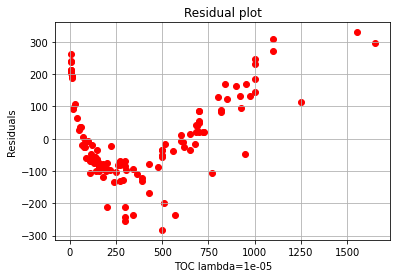

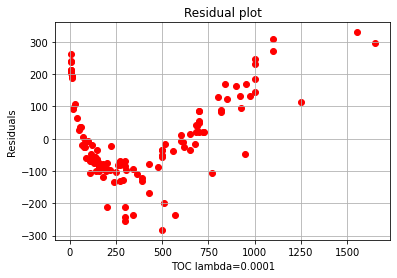

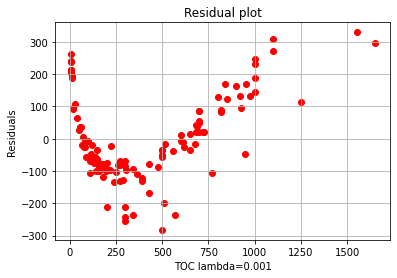

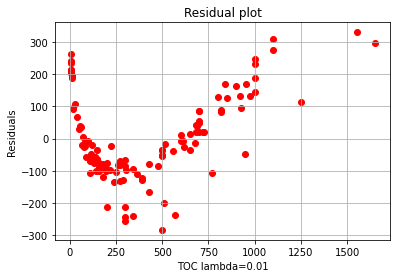

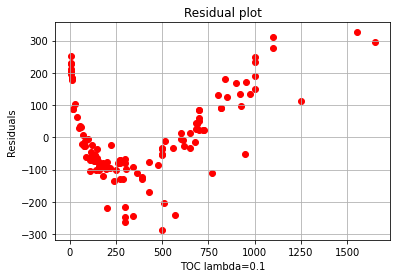

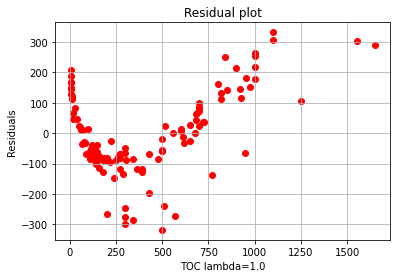

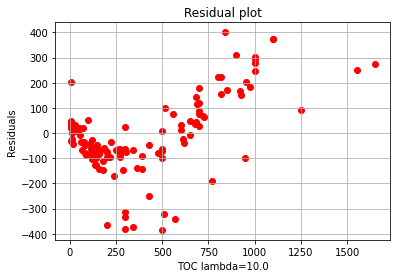

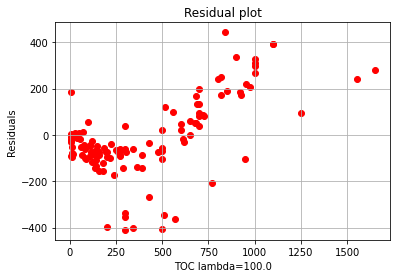

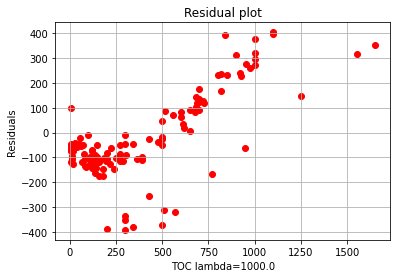

In [55]:
beta_idx = 0
for lambda_ in lambdas: 
  beta = betas[beta_idx]
  beta_idx += 1
  xlabel = 'TOC lambda='+str(lambda_)
  e_i_residuals_list = [] 

  for i in range(n): 
    x_i = X[i,:] #access i-th row of X
    y_i = y[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    e_i_residuals_list.append(e_i) #append the value of e_i to the list 

  #plot the residuals e_i against the actual observations y_i
  plt.scatter(weight_height_data['Weight_g'], e_i_residuals_list,color='r')
  plt.title("Residual plot")
  plt.xlabel(xlabel)
  plt.ylabel("Residuals")
  plt.grid()
  plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

Let us compute $R^2$. 

In [56]:
#We shall now compute R^2 for airline costs data

#first we shall compute y_bar 
y_bar = 0
for i in range(n): #access each row from the data set 
  y_i = float(weight_height_data.iat[i,1]) #access element at weight_g column
  y_bar += y_i

y_bar /= n
print('y_bar',y_bar)

#Next we shall compute sigma_yy, which is the variance of y 
sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(weight_height_data.iat[i,1]) #access element at weight column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#now we can compute sum of squared residuals 
beta_idx = 0
for lambda_ in lambdas:
  beta = betas[beta_idx]
  beta_idx+=1
  sum_sq_residuals = 0
  for i in range(n): #access each row from the data set 
    x_i = X[i,:] #access i-th row of X
    y_i = y[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals += (e_i)**2

  print('lambda:',lambda_)
  print('sum of squared residuals:', sum_sq_residuals)

  #Then we will compute the R^2 quantity
  R_sq = 1-sum_sq_residuals/sigma_yy
  print('R^2:',R_sq)
  print('*********************')

y_bar 404.4782258064517
sigma_yy: 15451937.951209672
lambda: 1e-05
sum of squared residuals: [2105849.77470906]
R^2: [0.86371614]
*********************
lambda: 0.0001
sum of squared residuals: [2105849.77672056]
R^2: [0.86371614]
*********************
lambda: 0.001
sum of squared residuals: [2105849.97773152]
R^2: [0.86371613]
*********************
lambda: 0.01
sum of squared residuals: [2105869.94026782]
R^2: [0.86371483]
*********************
lambda: 0.1
sum of squared residuals: [2107735.11704561]
R^2: [0.86359412]
*********************
lambda: 1.0
sum of squared residuals: [2212301.77766943]
R^2: [0.85682691]
*********************
lambda: 10.0
sum of squared residuals: [2981996.01612082]
R^2: [0.80701476]
*********************
lambda: 100.0
sum of squared residuals: [3437524.13568269]
R^2: [0.77753443]
*********************
lambda: 1000.0
sum of squared residuals: [3741593.87050371]
R^2: [0.75785601]
*********************


We observed that lambda = 0.001 is optimal $ \beta $

In [57]:
## extracting beta value associated with lambdaa = 0.001
beta_train = betas[2] ## index 2 corresponds to lambda = 0.001
print ('best beta')
print (beta_train)

best beta
[[  27.83933972]
 [   2.07373796]
 [  14.29315959]
 [-729.7198044 ]]


$\Large{\text{Q1-b.3 Prediction on weigth in test data}}$

In [58]:
weight_height_data_test = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q1/Q1_test.xlsx?raw=true', index_col=False, header=0)
weight_height_data_test

#extract the predictor variable columns 
cols = [1,2,3]
# print (airline_costs_data.columns[cols])
X_test_data = weight_height_data_test[weight_height_data_test.columns[cols]]

X_test_data

,Length_cm,Height_pct,Width_pct
0,34.7,39.2,14.2
1,39.5,38.3,14.1
2,46.5,37.9,13.7
3,41.5,39.8,14.1
4,35.1,39.9,13.8
5,34.0,31.6,19.3
6,24.3,27.3,14.6
7,29.2,30.4,15.4
8,27.2,27.7,14.1
9,21.2,26.3,13.7


In [59]:
#convert predictor variable columns into a numpy array

X_test_array = weight_height_data_test[weight_height_data_test.columns[cols]].to_numpy()
X_test_array

array([[34.7, 39.2, 14.2],
       [39.5, 38.3, 14.1],
       [46.5, 37.9, 13.7],
       [41.5, 39.8, 14.1],
       [35.1, 39.9, 13.8],
       [34. , 31.6, 19.3],
       [24.3, 27.3, 14.6],
       [29.2, 30.4, 15.4],
       [27.2, 27.7, 14.1],
       [21.2, 26.3, 13.7],
       [23.2, 40.5, 14.7],
       [19.8, 37.4, 13.5],
       [12.6, 15.7, 10.2],
       [13.1, 16.9,  9.8],
       [13.1, 16.9,  8.9],
       [64. , 15. ,  9.6],
       [45.5, 16. ,  9.5],
       [45.8, 17. , 11.2],
       [42.4, 29.2, 17.6],
       [31.6, 24.1, 15.1],
       [19.4, 26.8, 16.1],
       [22.5, 25.3, 16.3],
       [22.8, 28. , 15.5],
       [25. , 25.1, 14.9],
       [24.2, 24.6, 15. ],
       [24.5, 21.3, 14.8],
       [29.4, 26.6, 14.3],
       [46. , 27.4, 17.7],
       [30.1, 25.2, 15.4],
       [23.5, 26. , 14.5],
       [42.3, 28.2, 16.8],
       [42.5, 27.6, 17. ],
       [16. , 23.9, 15.2]])

In [60]:
#add a column of ones to X_train_array
X_test = np.hstack((X_test_array, np.ones((X_test_array.shape[0], 1), dtype=X_test_array.dtype)))

X_test

array([[34.7, 39.2, 14.2,  1. ],
       [39.5, 38.3, 14.1,  1. ],
       [46.5, 37.9, 13.7,  1. ],
       [41.5, 39.8, 14.1,  1. ],
       [35.1, 39.9, 13.8,  1. ],
       [34. , 31.6, 19.3,  1. ],
       [24.3, 27.3, 14.6,  1. ],
       [29.2, 30.4, 15.4,  1. ],
       [27.2, 27.7, 14.1,  1. ],
       [21.2, 26.3, 13.7,  1. ],
       [23.2, 40.5, 14.7,  1. ],
       [19.8, 37.4, 13.5,  1. ],
       [12.6, 15.7, 10.2,  1. ],
       [13.1, 16.9,  9.8,  1. ],
       [13.1, 16.9,  8.9,  1. ],
       [64. , 15. ,  9.6,  1. ],
       [45.5, 16. ,  9.5,  1. ],
       [45.8, 17. , 11.2,  1. ],
       [42.4, 29.2, 17.6,  1. ],
       [31.6, 24.1, 15.1,  1. ],
       [19.4, 26.8, 16.1,  1. ],
       [22.5, 25.3, 16.3,  1. ],
       [22.8, 28. , 15.5,  1. ],
       [25. , 25.1, 14.9,  1. ],
       [24.2, 24.6, 15. ,  1. ],
       [24.5, 21.3, 14.8,  1. ],
       [29.4, 26.6, 14.3,  1. ],
       [46. , 27.4, 17.7,  1. ],
       [30.1, 25.2, 15.4,  1. ],
       [23.5, 26. , 14.5,  1. ],
       [42

In [61]:
## we first compute size of test data
n_test = len(weight_height_data_test.index) #number of data points in the test data
# print('number of data points in the test data:',n_test)

e_i_residuals_list_test = [] ## stores residuals on test data
for i in range(n_test): 
  x_i = X_test[i,:] #access i-th row of X_test

  y_pred_i = np.dot(x_i,beta_train) # compute the prediction obtained using the regression coefficients 
  #e_i_test = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i
  
  print(y_pred_i)

[520.55867824]
[650.89182876]
[839.22044777]
[709.68111515]
[527.42876687]
[558.20584581]
[212.06932722]
[366.34520721]
[286.4863278]
[110.8297925]
[210.24871062]
[92.01457638]
[-200.59621008]
[-189.9053185]
[-202.76916213]
[1220.31833914]
[705.93497635]
[740.65888753]
[762.78095703]
[415.80712548]
[96.059433]
[182.1094111]
[184.62577785]
[231.28258938]
[209.40356458]
[208.05339929]
[348.31039533]
[860.69916764]
[380.61717554]
[185.67268013]
[746.48875742]
[753.67101451]
[-17.47200577]
